In [1]:
pip install sm

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
    --------------------------------------- 0.2/9.8 MB 7.3 MB/s eta 0:00:02
   --- ------------------------------------ 0.9/9.8 MB 9.7 MB/s eta 0:00:01
   ---- ----------------------------------- 1.0/9.8 MB 11.1 MB/s eta 0:00:01
   ---- ----------------------------------- 1.0/9.8 MB 11.1 MB/s eta 0:00:01
   ---- ----------------------------------- 1.0/9.8 MB 11.1 MB/s eta 0:00:01
   ------ --------------------------------- 1.6/9.8 MB 6.1 MB/s eta 0:00:02
   -------- ------------------------------- 2.1/9.8 MB 6.7 MB/s eta 0:00:02
   -------- ------------------------------- 2.1/9.8 MB 6.7 MB/s eta 0:00:02
   -------- ------------------------------- 2.1/9.8 MB 5.2 MB/s eta 0:00:02
   ------------ --------------------------- 3.0/9.8 MB 6.6 MB/s eta 0:00:02
   --------------- ------------------------ 3.9/9.8 MB 7.4 MB/s eta 0:00:01
   ------------------- -------------------- 4.9/9.8 MB 8.6 MB/s eta 0:00:01
   -------------

### Importing Libraries

In [105]:
import pandas as pd
import numpy as np
#import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error

from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.metrics import mean_squared_error, mean_absolute_error


from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns
color_pal = sns.color_palette()
from zipfile import ZipFile 
import warnings
warnings.filterwarnings('ignore')

### Importing Dataset

In [106]:
Tesla_data=pd.read_csv("TSLA.csv",parse_dates=['Date'], index_col='Date')


### Viewing the first five rows

In [107]:
Tesla_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


### Viewing the last five rows

In [108]:
Tesla_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300
2020-02-03,673.690002,786.140015,673.520020,780.000000,780.000000,47065000


### Data Exploration

In [109]:
Tesla_data.shape

(2416, 6)

In [110]:
Tesla_data.size

14496

In [111]:
Tesla_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [112]:
Tesla_data.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [113]:
Tesla_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


### Data Visualization

array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Close'}>],
       [<Axes: title={'center': 'Adj Close'}>,
        <Axes: title={'center': 'Volume'}>]], dtype=object)

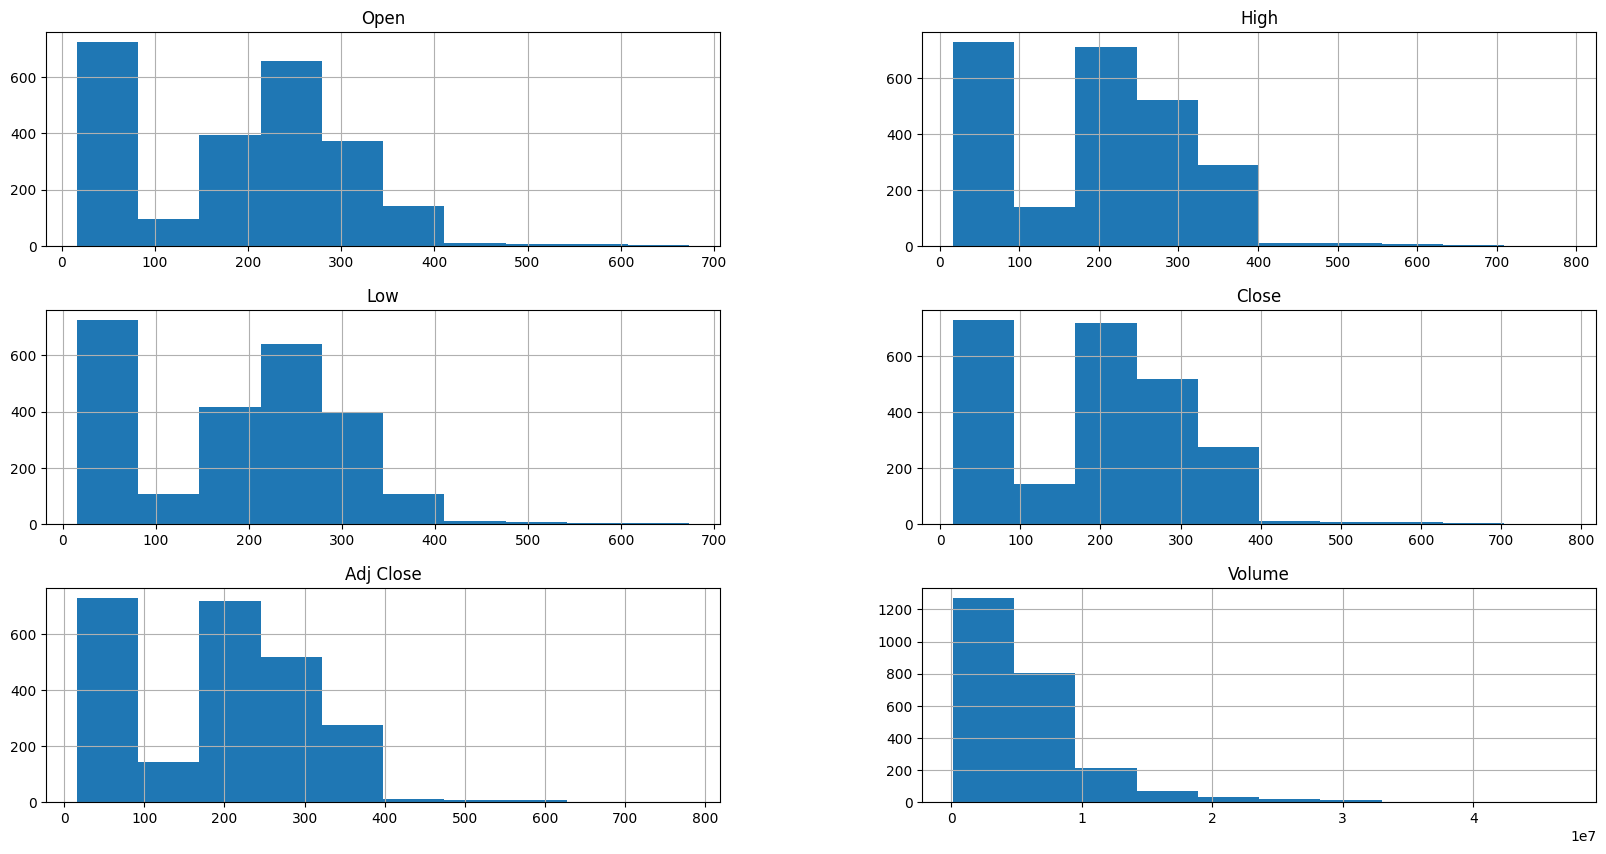

In [114]:
Tesla_data.hist(figsize=(20,10))

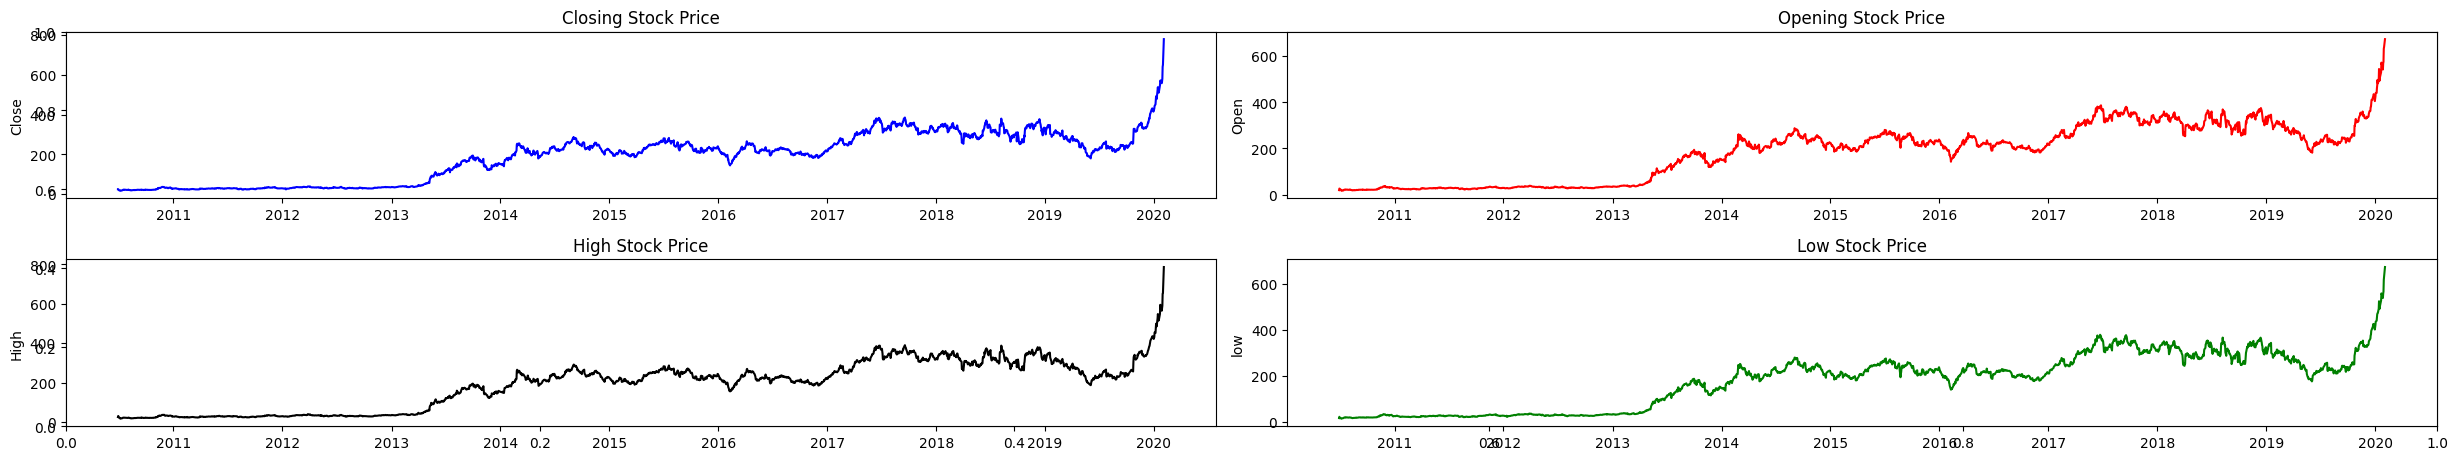

In [115]:
fig,ax = plt.subplots(figsize=(25,5))
plt.subplot(2,2,1)
plt.plot(Tesla_data['Close'], color = 'blue')
plt.ylabel('Close')
plt.title('Closing Stock Price')
plt.subplot(2,2,2)
plt.plot(Tesla_data['Open'], color = 'r')
plt.ylabel('Open')
plt.title('Opening Stock Price')
plt.subplot(2,2,3)
plt.plot(Tesla_data['High'], color = 'k')
plt.ylabel('High')
plt.title('High Stock Price')
plt.subplot(2,2,4)
plt.plot(Tesla_data['Low'], color ='g')
plt.title('Low Stock Price')
plt.ylabel('low')
plt.tight_layout()

In [116]:
Tesla_data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [117]:
Tesla_data.duplicated().sum()

0

<Axes: xlabel='High'>

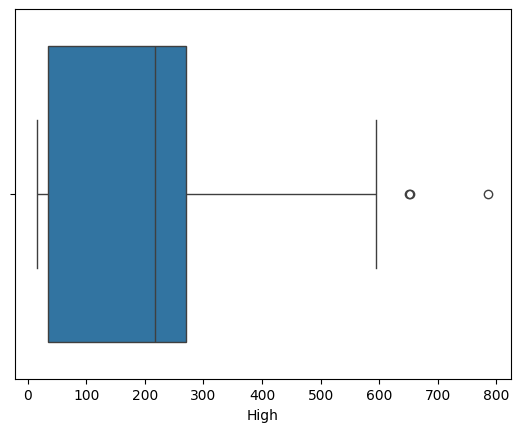

In [118]:
sns.boxplot(x=Tesla_data['High'])

<Axes: xlabel='Low'>

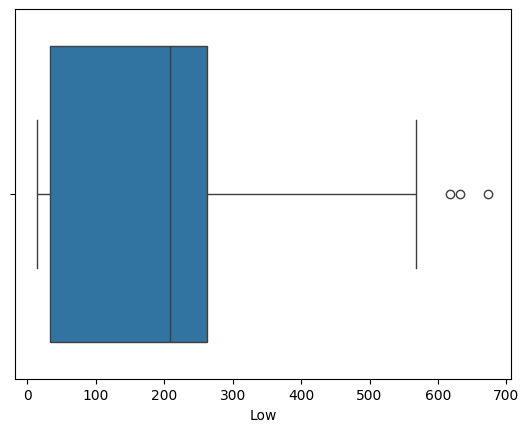

In [119]:
sns.boxplot(x=Tesla_data['Low'])

<Axes: xlabel='Open'>

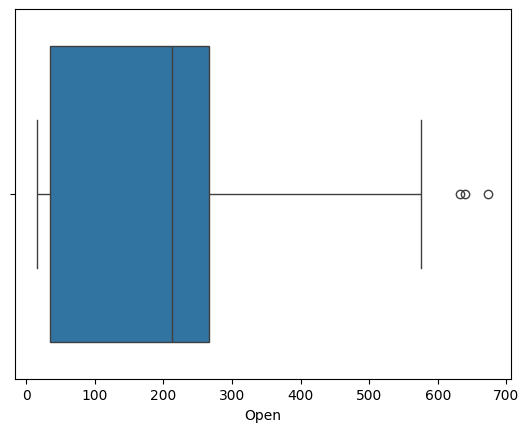

In [120]:
sns.boxplot(x=Tesla_data['Open'])

<Axes: xlabel='Close'>

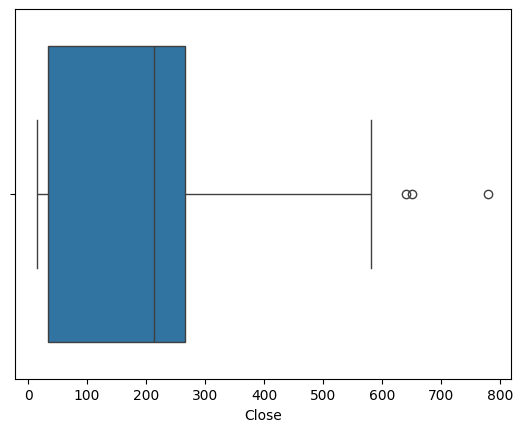

In [121]:
sns.boxplot(x=Tesla_data['Close'])

Text(0.5, 1.0, 'Volume')

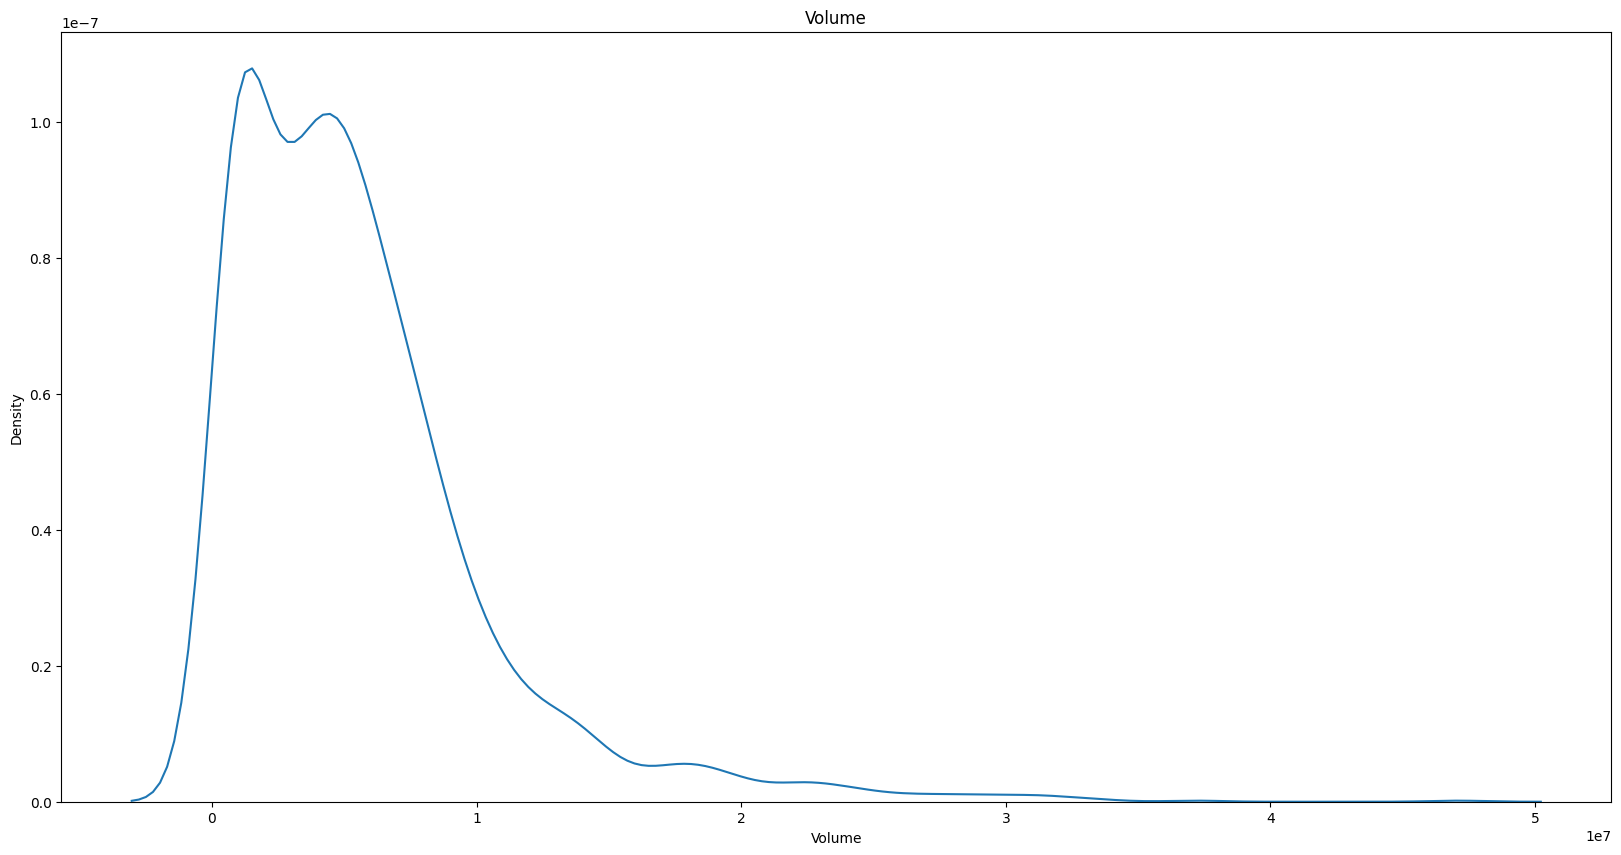

In [122]:
plt.figure(figsize=(20, 10))
sns.kdeplot(Tesla_data['Volume'])
plt.title('Volume')

In [123]:
Tesla_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [124]:
df1_copy = Tesla_data.copy()

In [125]:
df1_copy.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [126]:
df1_copy = df1_copy.loc[:,['Close','Open','High','Low','Adj Close','Volume']]

In [127]:
#x['sex']=x['sex'].astype('int')

,Close,Open,High,Low,Adj Close,Volume
Close,1.000000,0.998886,0.999640,0.999447,1.000000,0.505169
Open,0.998886,1.000000,0.999425,0.999575,0.998886,0.501762
High,0.999640,0.999425,1.000000,0.999389,0.999640,0.512944
Low,0.999447,0.999575,0.999389,1.000000,0.999447,0.493496
Adj Close,1.000000,0.998886,0.999640,0.999447,1.000000,0.505169
Volume,0.505169,0.501762,0.512944,0.493496,0.505169,1.000000


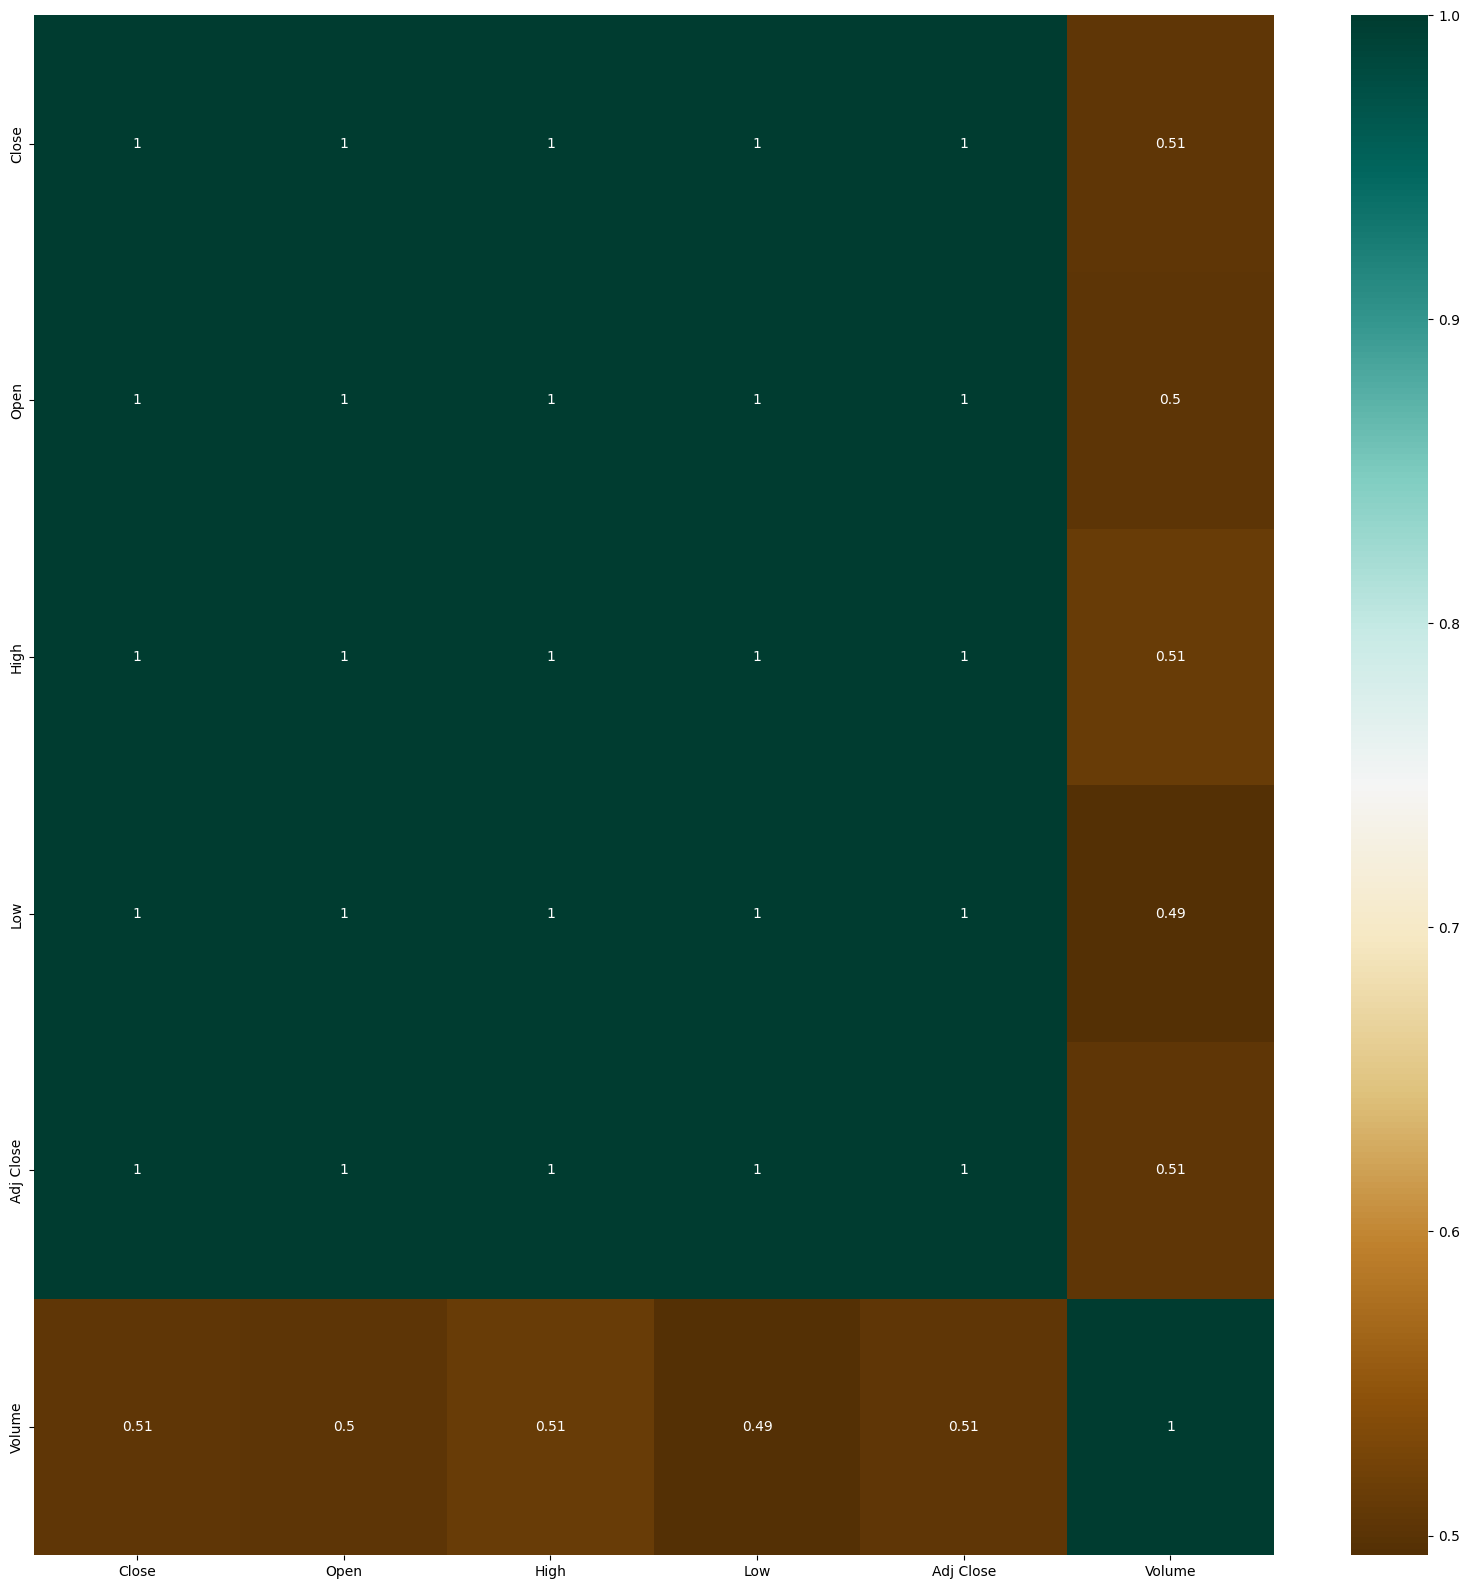

In [128]:
plt.figure(figsize=(20,20))
cor=df1_copy.corr()
sns.heatmap(cor,cmap="BrBG", annot=True)
cor

In [129]:
Tesla_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


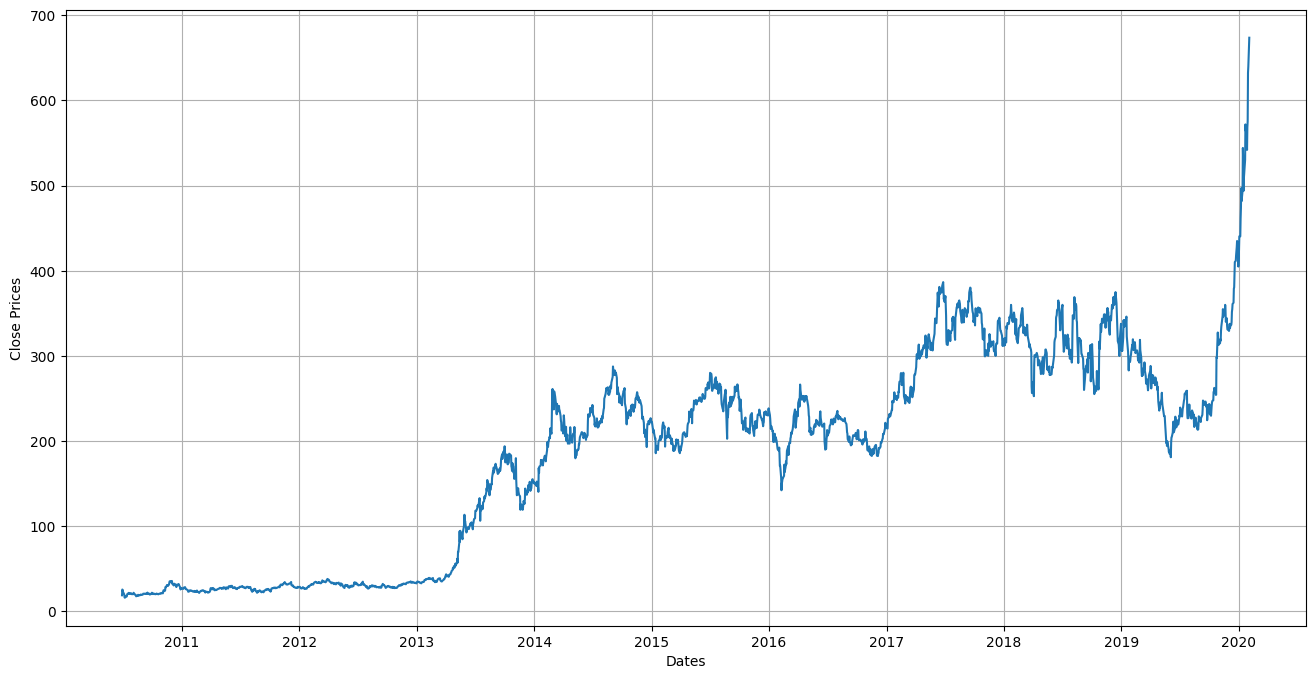

In [130]:
plt.figure(figsize=(16,8))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(Tesla_data['Open']);




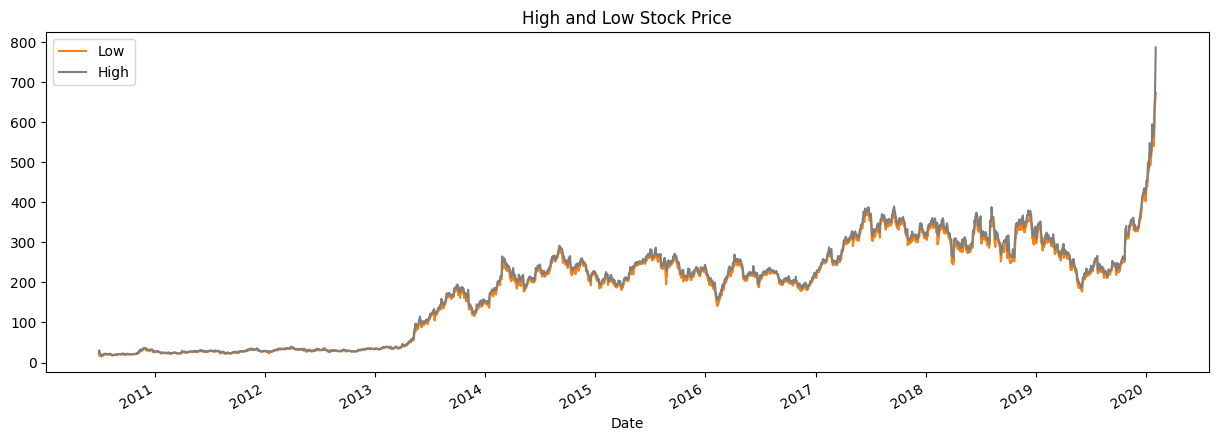

In [131]:
fig, ax = plt.subplots(figsize=(15, 5))
Tesla_data['Low'].plot(ax=ax, color=color_pal[1], label='Low')
Tesla_data['High'].plot(ax=ax, color=color_pal[7], label='High')

plt.title('High and Low Stock Price')
plt.legend()
plt.show()

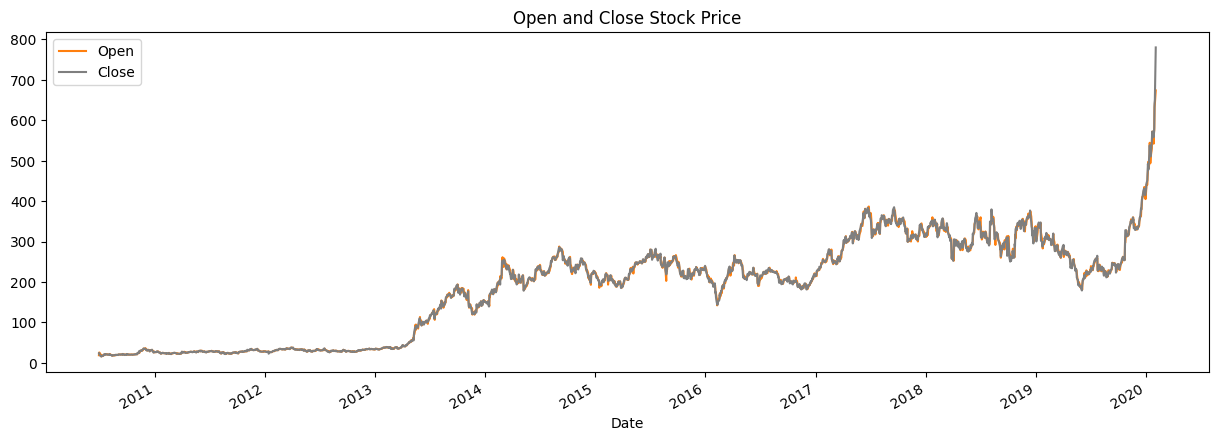

In [132]:
### Stock Open and Close Price


fig, ax = plt.subplots(figsize=(15, 5))
Tesla_data['Open'].plot(ax=ax, color=color_pal[1], label='Open')
Tesla_data['Close'].plot(ax=ax, color=color_pal[7], label='Close')

plt.title('Open and Close Stock Price')
plt.legend()
plt.show()

### LSTM Modeling

In [133]:
train_data, test_data = df[0:int(len(df)*0.9)], df[int(len(df)*0.9):]

In [134]:
train = train_data.iloc[:,4:5].values

In [135]:
train

array([[ 23.889999],
       [ 23.83    ],
       [ 21.959999],
       ...,
       [308.170013],
       [303.769989],
       [307.880005]])

In [136]:
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train) 

In [137]:
timesteps = 7
X_train = []
y_train = []
for i in range(timesteps, train.shape[0]):
    X_train.append(train_scaled[i-timesteps:i, 0]) 
    y_train.append(train_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [138]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
from numpy.random import seed
seed(101)

In [139]:
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
# Dropout regularisation for tackling overfitting
model.add(Dropout(0.20))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.25))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.25))

# Adding the output layer
model.add(Dense(units = 1))


# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 40, batch_size = 32)

Epoch 1/40
68/68 [==============================] - 18s 31ms/step - loss: 0.0519
Epoch 2/40
68/68 [==============================] - 2s 34ms/step - loss: 0.0063
Epoch 3/40
68/68 [==============================] - 2s 31ms/step - loss: 0.0049
Epoch 4/40
68/68 [==============================] - 2s 33ms/step - loss: 0.0045
Epoch 5/40
68/68 [==============================] - 2s 32ms/step - loss: 0.0042
Epoch 6/40
68/68 [==============================] - 2s 31ms/step - loss: 0.0039
Epoch 7/40
68/68 [==============================] - 2s 33ms/step - loss: 0.0036
Epoch 8/40
68/68 [==============================] - 2s 32ms/step - loss: 0.0040
Epoch 9/40
68/68 [==============================] - 2s 31ms/step - loss: 0.0034
Epoch 10/40
68/68 [==============================] - 2s 31ms/step - loss: 0.0035
Epoch 11/40
68/68 [==============================] - 2s 32ms/step - loss: 0.0037
Epoch 12/40
68/68 [==============================] - 3s 37ms/step - loss: 0.0037
Epoch 13/40
68/68 [=================

In [140]:
real_stock_price = test_data.iloc[:,4:5].values # taking open price

In [141]:
test_data['Close']

Date
2019-02-19    305.640015
2019-02-20    302.559998
2019-02-21    291.230011
2019-02-22    294.709991
2019-02-25    298.769989
                 ...    
2020-01-28    566.900024
2020-01-29    580.989990
2020-01-30    640.809998
2020-01-31    650.570007
2020-02-03    780.000000
Name: Close, Length: 242, dtype: float64

In [142]:
combine = pd.concat((train_data['Close'], test_data['Close']), axis = 0)
test_inputs = combine[len(combine) - len(test_data) - timesteps:].values
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)

In [143]:
test_data.shape

(242, 6)

In [144]:
X_test = []
for i in range(timesteps, test_data.shape[0]+timesteps):
    X_test.append(test_inputs[i-timesteps:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
# inverse_transform because prediction is done on scaled inputs
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

8/8 [==============================] - 4s 19ms/step


In [145]:
print('LSTM Model Evaluation Metrics')
print('-----------------------------')
mse = mean_squared_error(real_stock_price, predicted_stock_price)
print('MSE: '+str(mse))
mae = mean_absolute_error(real_stock_price, predicted_stock_price)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print('RMSE: '+str(rmse))

LSTM Model Evaluation Metrics
-----------------------------
MSE: 2149.6849496695772
MAE: 23.348502414595174
RMSE: 46.36469507793163


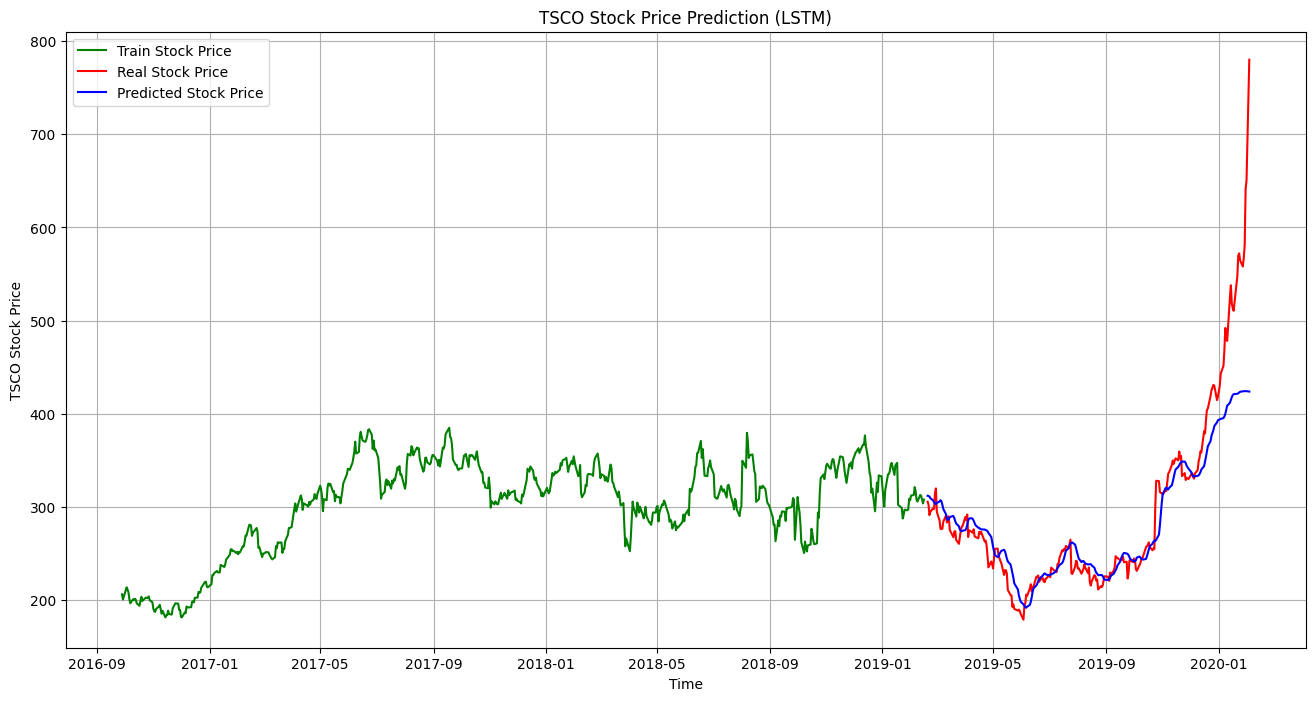

In [146]:
plt.figure(figsize=(16,8))
plt.plot(train_data.index[-600:],train_data['Close'][-600:], color='green', label = 'Train Stock Price')
plt.plot(test_data.index, real_stock_price, color = 'red', label = 'Real Stock Price')
plt.plot(test_data.index, predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.title('TSCO Stock Price Prediction (LSTM)')
plt.xlabel('Time')
plt.ylabel('TSCO Stock Price')
plt.legend()
plt.grid(True)
plt.savefig('lstm_30.pdf')
plt.show()

